# Poisson Distribution

Here let's try to understand the statistics of a random process, with random discrete events occuring at some regular rate in time, specifically:

$$\text{Probability}[\text{Number of events increasing from}~ m ~\text{to}~ m+1 ~\text{in time interval from}~ t ~\text{to}~ t+dt] = \lambda dt$$

where $\lambda$ is the probability per unit time, and $dt$ must be small enough such that $\lambda dt \ll 1$

In [39]:
import numpy as np
import matplotlib.pyplot as plt


In [46]:
np.random.random_sample()

0.7204662022160588

In [2]:
def roll(p):
    # 0 <= p < 1. Event occurs if rand < p
    
    if np.random.random_sample() <= p:
        ans = 1
    else:
        ans = 0

    return ans

In [51]:
lam = .3
dt = .1

# p = lam*dt

Nexp = 5  # number of experiments
Nt = 1000 # t = dt*Nt

t = np.linspace(0,dt*Nt,Nt)
M = np.zeros((Nexp,Nt))

for k in range(Nexp):
    for j in range(Nt-1):
        M[k,j+1] = M[k,j] + roll(dt*lam)
#    plt.plot(t,M[k,:])

M.shape


(5, 1000)

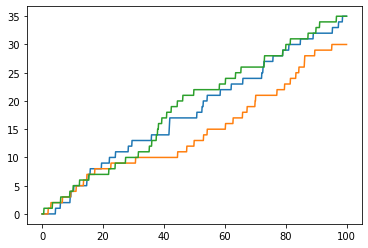

In [54]:
plt.plot(t,M[0,:])
plt.plot(t,M[1,:])
plt.plot(t,M[2,:])


To compute P(m,t), we separately ask: 

(1) For a given t, what is the distribution of the number of events, m? 

(2) For a given m, what is the distribution of times by which m events have occurred?

In [4]:
def rollNt(T,dt,lam):
    # Return number of events after T = Nt*dt time units, occuring with probability lam*dt per sample window

    Nt = int(np.round(T/dt))

    M = 0
    for j in range(Nt-1):
        M = M + roll(lam*dt)
    
    return M


In [55]:
Nexp = 1000

lam = .3
dt = .1

# Know mu = lam*t = m_bar, and we'd like m_bar up to say 10
Tmax = 30
Ntmax = int(np.round(Tmax/dt))+1

t = np.linspace(0,Tmax,Ntmax)  # collect output at integer t values

D = np.zeros((Nexp,Ntmax))
for j in range(Nexp):
    for k in range(Ntmax-1):
        D[j,k] = rollNt(k*dt,dt,lam)

D.shape

(1000, 301)

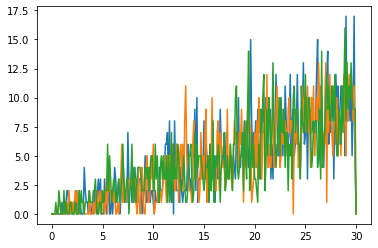

In [57]:
plt.plot(t,D[0,:])
plt.plot(t,D[1,:])
plt.plot(t,D[2,:])


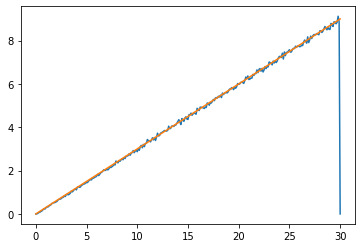

In [58]:
plt.plot(t,np.mean(D,axis=0))
plt.plot(t,lam*t)   # m_bar = lam * t = mu

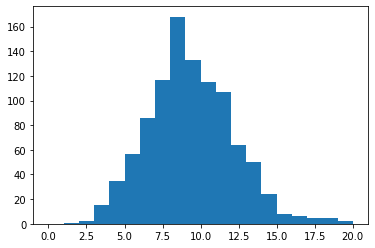

In [61]:
# Histogram of D 
arr = plt.hist(D[:,299],range(21))

In [29]:
arr[0]

array([  0.,   1.,  10.,   8.,  38.,  50.,  86., 120., 125., 136., 132.,
        98.,  72.,  56.,  27.,  22.,   7.,   8.,   3.,   1.])

In [30]:
arr[1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [18]:
np.sum(arr[0])

999.0

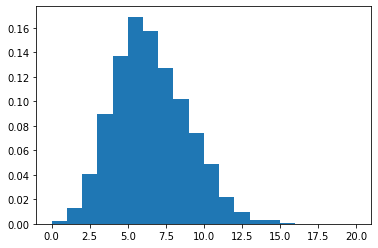

In [64]:
arr = plt.hist(D[:,199],range(21),density=True)

In [65]:
np.sum(arr[0])

1.0

In [66]:
# Normalize PDF

Nr = 20
P = np.zeros((Nr,Ntmax))
for j in range(Ntmax):
    arr = np.histogram(D[:,j],range(Nr+1),density=True)
    P[:,j] = arr[0]



<BarContainer object of 20 artists>

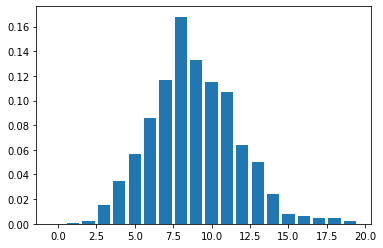

In [67]:
m = range(Nr)
plt.bar(m,P[:,299])

In [11]:
def poiss(mu,m):
    P = np.exp(-mu)*(mu**m)/np.math.factorial(m)
    return P


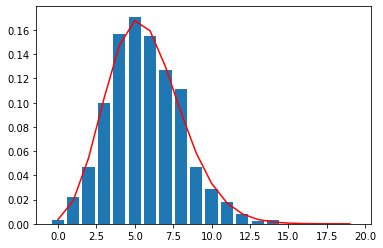

In [68]:
jt = 190

Pp = np.zeros(len(m))
for mj in m:
    Pp[mj] = poiss(lam*t[jt],mj)
    
plt.bar(m,P[:,jt])
plt.plot(m,Pp,'r')


In [27]:
Pf = np.zeros((len(m),len(t)))

for jm in m:
    for jt in range(Ntmax):
        Pf[jm,jt] = poiss(lam*t[jt],jm)

Pf.shape

(20, 301)

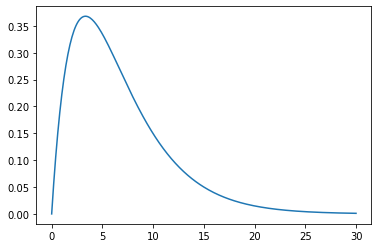

In [31]:
plt.plot(t,Pf[1,:])


In [38]:
np.sum(Pf[1,:])

33.290249720417165